In [1]:
import sys, os

# DWave Credentials
dwave_solver = "DW_2000Q_2_1"
api_key = 'DEV-3142f58be13a0aacd44657b15b8fb9832ba3bdac'

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite

import dwave_networkx as dnx

### Use NetworkX graphic package to create a signed network
import networkx as nx

# Select a D-Wave system and handle mapping from problem graph to sampler graph
sampler = EmbeddingComposite(DWaveSampler(solver=dwave_solver, token=api_key))

In [2]:
# Import graph node labels
node_labels = []
with open('CryptoData/CryptoSymbols.csv') as f:
    for line in f.readlines():
        line = line.rstrip() 
        node_labels.append(line)

In [14]:
# Import correlation data
import scipy.io as sio

corr_tensor_15 = sio.loadmat('CryptoData/S_mat_C15.mat').get('S_mat')
corr_tensor_20 = sio.loadmat('CryptoData/S_mat_C20.mat').get('S_mat')
corr_tensor_25 = sio.loadmat('CryptoData/S_mat_C25.mat').get('S_mat')
corr_tensor_29 = sio.loadmat('CryptoData/S_mat_C29.mat').get('S_mat')
corr_tensor_32 = sio.loadmat('CryptoData/S_mat_32.mat').get('S_mat')

In [4]:
# Plot Frustration score over time
frustration_array = []
density_array = []

for i in range(1,72):
    G = nx.Graph()
    G.add_nodes_from(node_labels)
    corr_matrix = corr_matrices[i*10,:,:]
    
    # Add weighted edges to graph
    for i in range(27):
        for j in range(i+1, 27):
            if corr_matrix[i,j] < 0:
                G.add_edge(node_labels[i], node_labels[j], sign=-1)
            elif corr_matrix[i,j] > 0:
                G.add_edge(node_labels[i], node_labels[j], sign=1)
    
    density = (2*G.number_of_edges())/(27*26)
    
    try:
        imbalance, bicoloring = dnx.structural_imbalance(G, sampler)
        frustration_array.append(len(list(imbalance.keys()))/G.number_of_edges())
        density_array.append(density)
    except:
        print(sys.exc_info()[0])
        print(i)

<class 'RuntimeError'>
26
<class 'RuntimeError'>
26


IndexError: index 710 is out of bounds for axis 0 with size 701

Text(0.5, 1.0, 'Frustration Score vs Time')

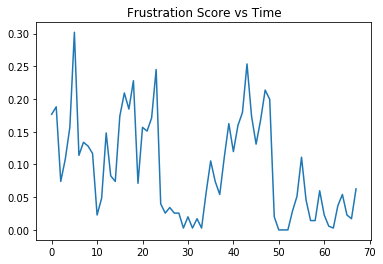

In [6]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(frustration_array)
plt.title("Frustration Score vs Time")

Text(0.5, 1.0, 'Frustration Score vs Graph Density')

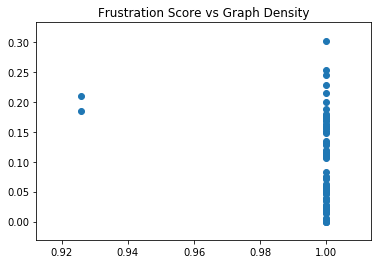

In [8]:
plt.figure(2)
plt.scatter(density_array, frustration_array)
plt.title("Frustration Score vs Graph Density")